# Time Series Forecasting using RNN models

This jupyter notebook is based on codes from [here](https://github.com/dlmacedo/starter-academic) and datasets from

[Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) and

[Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).


## Download Dataset

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-10-22 06:42:37--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2021-10-22 06:42:38 (19.2 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



## Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

## Data Plot

The data of number of passengers.

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')

In [ ]:
training_set.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
training_set.iloc[:10,:]

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
training_set.iloc[:,1:2]

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [ ]:
training_set.iloc[:,1].values.shape, training_set.iloc[:,1].values

((144,),
 array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
        359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
        362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
        432]))

In [ ]:
training_set.iloc[:,1:2].values.shape, training_set.iloc[:,1:2].values

((144, 1), array([[112],
        [118],
        [132],
        [129],
        [121],
        [135],
        [148],
        [148],
        [136],
        [119],
        [104],
        [118],
        [115],
        [126],
        [141],
        [135],
        [125],
        [149],
        [170],
        [170],
        [158],
        [133],
        [114],
        [140],
        [145],
        [150],
        [178],
        [163],
        [172],
        [178],
        [199],
        [199],
        [184],
        [162],
        [146],
        [166],
        [171],
        [180],
        [193],
        [181],
        [183],
        [218],
        [230],
        [242],
        [209],
        [191],
        [172],
        [194],
        [196],
        [196],
        [236],
        [235],
        [229],
        [243],
        [264],
        [272],
        [237],
        [211],
        [180],
        [201],
        [204],
        [188],
        [235],
        [227],
        [234],
        [264],


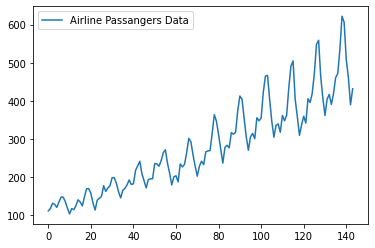

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values

def plot_data(data, label):
    plt.plot(data, label=label)
    plt.legend()
    plt.show()
    
plot_data(training_set, label='Airline Passangers Data')

## Dataloading

### Data normalization
- MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

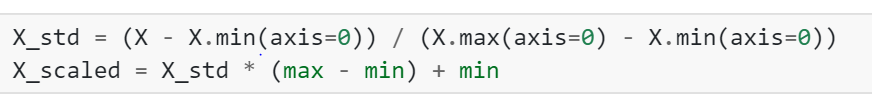

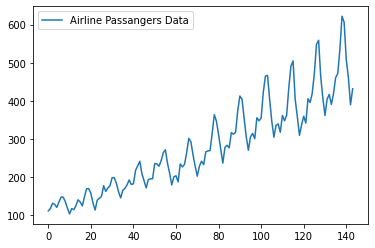

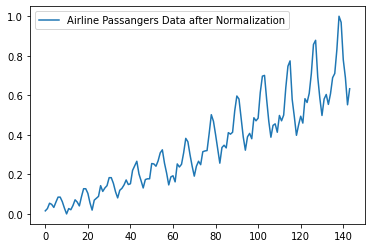

In [ ]:
plot_data(training_set, label='Airline Passangers Data')

# normalize
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

plot_data(training_data, label='Airline Passangers Data after Normalization')

### What is sliding window?
- Example of sliding window technique for time-series forecasting task:

- Image source: https://eng.uber.com/2017-highlights/

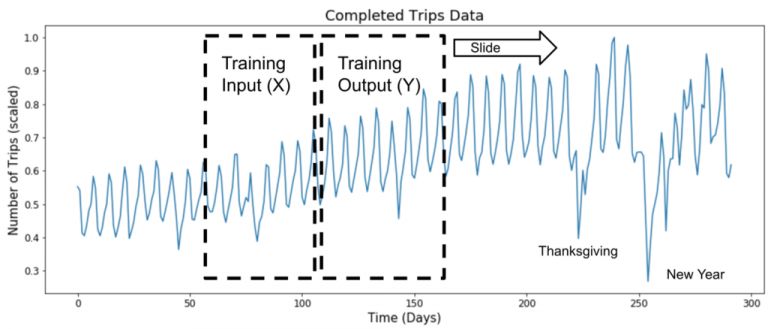

In [ ]:
def sliding_windows(data, seq_length):
    x_list = []
    y_list = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        x_list.append(x)
        y_list.append(y)

    return np.array(x_list),np.array(y_list)

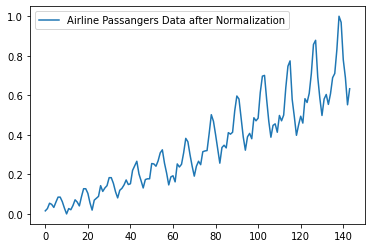

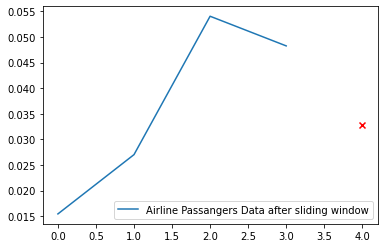

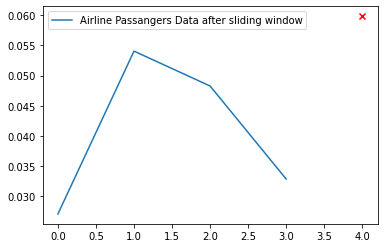

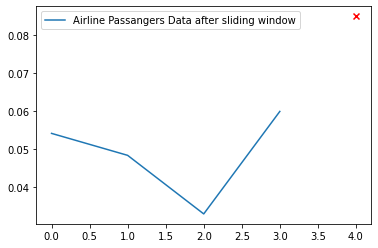

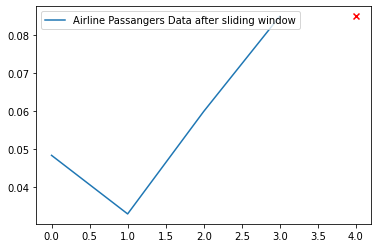

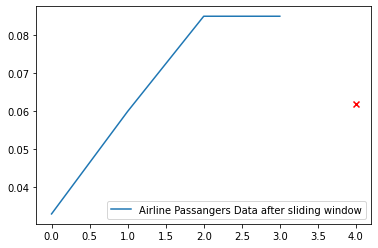

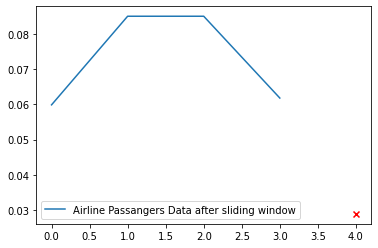

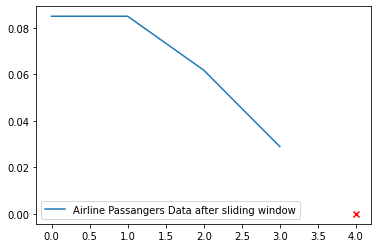

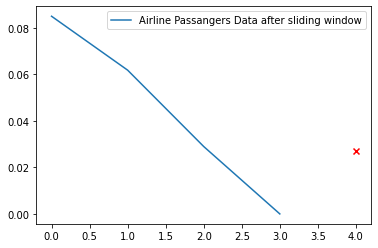

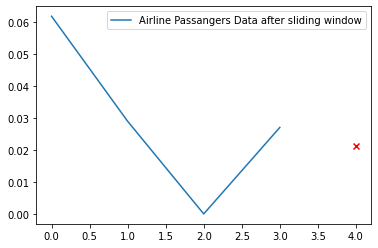

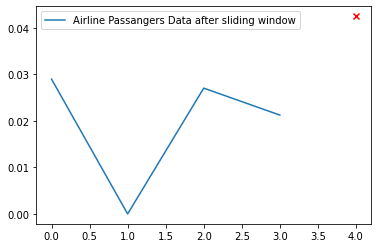

In [ ]:
plot_data(training_data, label='Airline Passangers Data after Normalization')

# sliding window
x, y = sliding_windows(training_data, seq_length=4)

for i in range(10):
    plt.scatter(x.shape[1], y[i][0], marker='x', c='red')
    plot_data(x[i], label='Airline Passangers Data after sliding window')

In [ ]:
# Data shape before and after applying sliding window technique
print(training_data.shape)
print(x.shape, y.shape)

(144, 1)
(139, 4, 1) (139, 1)


In [ ]:
training_data[-6:]

array([[1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [ ]:
x[-1], y[-1]

(array([[1.        ],
        [0.96911197],
        [0.77992278],
        [0.68918919]]), array([0.55212355]))

### Model training set and test set split

In [ ]:
# 7:3
training_set_size = int(len(y) * 0.7)

trainX = torch.tensor(x[:training_set_size], dtype=torch.float32)
trainY = torch.tensor(y[:training_set_size], dtype=torch.float32)

testX = torch.tensor(x[training_set_size:], dtype=torch.float32)
testY = torch.tensor(y[training_set_size:], dtype=torch.float32)

In [ ]:
trainX.shape, trainY.shape, testX.shape, testY.shape

(torch.Size([97, 4, 1]),
 torch.Size([97, 1]),
 torch.Size([42, 4, 1]),
 torch.Size([42, 1]))

### PyTorch dataloader

In [ ]:
class simple_dataset(Dataset):
    def __init__(self, x, y):
        super(simple_dataset, self).__init__()
        
        self.x = x
        self.y = y
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.y)
    
train_set = simple_dataset(trainX, trainY)
test_set = simple_dataset(testX, testY)
train_loader = DataLoader(dataset=train_set, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, num_workers=2, shuffle=False)

## Model

- LSTM: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
- GRU: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html
- Image source: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

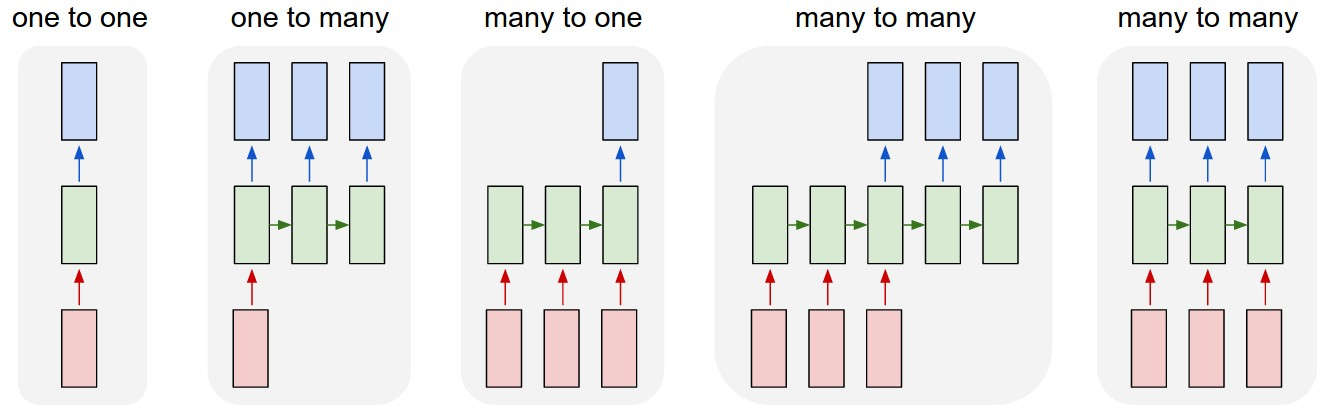


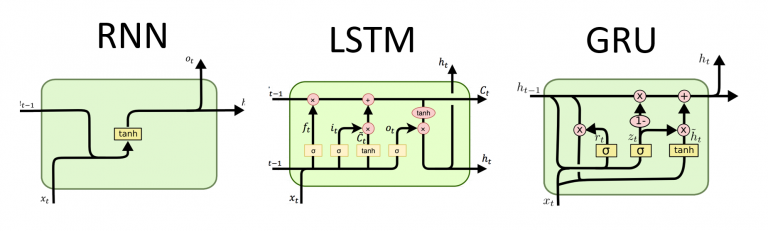

In [ ]:
class LSTM_model(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(LSTM_model, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        c_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        
        _, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out[-1]
        out = self.fc(h_out)
        
        return out

In [ ]:
class GRU_model(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(GRU_model, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Layers
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        
        _, h_out = self.gru(x, h_0)
        h_out = h_out[-1]
        out = self.fc(h_out)
        
        return out

## Training

### Experimental settings

In [ ]:
num_epochs = 100
learning_rate = 0.01

output_size = 1
input_size = 1
hidden_size = 2
num_layers = 1

model = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train the model

In [ ]:
model = model.cuda()
train_loss_list = []
for epoch in range(num_epochs):
    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list.append(loss)
        
    if epoch % 50 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.00010
Epoch: 50, loss: 0.01228


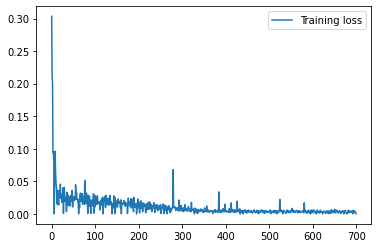

In [ ]:
plot_data(train_loss_list, label='Training loss')

## Testing for Airplane Passengers Dataset

In [ ]:
model.eval()

trainX = trainX.cuda()
trainY = trainY.cuda()
prediction = model(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

testX = testX.cuda()
testY = testY.cuda()
prediction = model(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0032, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0321, device='cuda:0', grad_fn=<MeanBackward0>)


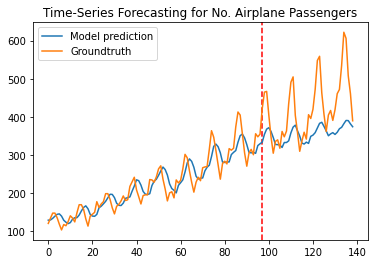

In [ ]:
model.eval()

x = torch.cat((trainX, testX), 0)
y = torch.cat((trainY, testY), 0).data.cpu().numpy()

predictions = model(x)
predictions = predictions.data.cpu().numpy()

predictions = sc.inverse_transform(predictions)
labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()